In [25]:
from stompy.model.suntans import sun_driver
import xarray as xr
import numpy as np
from stompy import utils
from stompy.grid import unstructured_grid
import matplotlib.pyplot as plt
from stompy.model.fish_ptm import ptm_tools
%matplotlib notebook

In [73]:
#ptmdata=ptm_tools.PtmBin("/home/rusty/src/sfb_ocean/ptm/test_basic/INITSURF_bin.out")
ptmdata=ptm_tools.PtmBin("/home/rusty/src/sfb_ocean/ptm/test_basic/INIT_NOKK_bin.out")


In [3]:
model=sun_driver.SuntansModel.load("/opt/sfb_ocean/suntans/runs/merge_005-20170610avg-retry/")

INFO:DFlowModel:Will read cell depths, too
INFO:DFlowModel:Will read edge depths, too
INFO:UnstructuredGrid:Will flip 0 edges


In [7]:
avgds=xr.open_dataset(model.avg_outputs()[0])

In [9]:
g=unstructured_grid.UnstructuredGrid.from_ugrid(avgds)

In [11]:
avgds

<xarray.Dataset>
Dimensions:       (Nc: 57719, Ne: 108448, Nk: 50, Nkw: 51, Np: 50711, Two: 2, numsides: 6, time: 480)
Coordinates:
    xv            (Nc) float64 5.809e+05 5.827e+05 ... 5.295e+05 5.298e+05
    yv            (Nc) float64 4.151e+06 4.152e+06 ... 4.176e+06 4.176e+06
    xe            (Ne) float64 ...
    ye            (Ne) float64 ...
    z_r           (Nk) float64 ...
    z_w           (Nkw) float64 ...
    Nk            (Nc) int32 ...
  * time          (time) datetime64[ns] 2017-06-10 ... 2017-06-19T23:30:00
Dimensions without coordinates: Nc, Ne, Nkw, Np, Two, numsides
Data variables:
    suntans_mesh  int32 ...
    cells         (Nc, numsides) int32 0 11345 358 ... 999999 999999 999999
    nfaces        (Nc) int32 ...
    face          (Nc, numsides) int32 ...
    edges         (Ne, Two) int32 5057 5058 5053 5057 ... 50664 50705 50664
    neigh         (Nc, numsides) int32 ...
    grad          (Ne, Two) int32 ...
    xp            (Np) float64 5.809e+05 5.825e+05 ..

In [12]:
ec=g.edges_center()
cc=g.cells_center()


In [66]:
ptmdata.read_timestep(120)

(datetime.datetime(2017, 6, 18, 10, 0),
 array([(    1, [ 5.47389394e+05,  4.18785852e+06, -7.29043121e+00], 1),
        (    2, [ 5.50128047e+05,  4.18771607e+06, -2.86590473e+01], 1),
        (    3, [ 5.52846093e+05,  4.18967403e+06, -1.86762075e+01], 1),
        ...,
        (13897, [ 5.45001910e+05,  4.18523168e+06, -3.98340987e+01], 1),
        (13898, [ 5.53196367e+05,  4.18698833e+06, -1.05333460e+01], 1),
        (13899, [ 5.50207658e+05,  4.18853839e+06, -1.15923467e+01], 1)],
       dtype=[('id', '<i4'), ('x', '<f8', (3,)), ('active', '<i4')]))

<IPython.core.display.Javascript object>


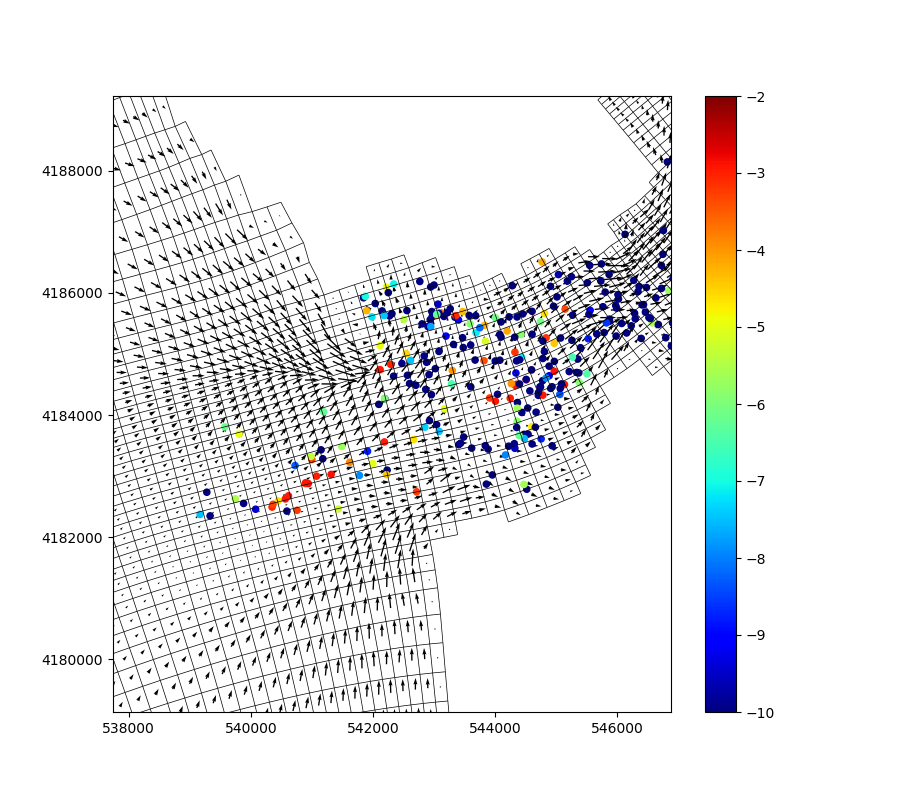

PTM: [136] 2017-06-18 11:20:00  AVG: [406] 2017-06-18T11:00:00.000000000


(537733.0, 546870.0, 4180777.0, 4187586.0)

In [68]:
fig=plt.figure(figsize=(9,8))
ax=fig.add_subplot(1,1,1)
g.plot_edges(color='k',lw=0.5)
ptm_ts=136
part_time,particles=ptmdata.read_timestep(ptm_ts)

ti=-1+np.searchsorted(avgds.time.values, utils.to_dt64(part_time)) # hydro time step
print("PTM: [%d] %s  AVG: [%d] %s"%(ptm_ts,part_time,
                                    ti,avgds.time.values[ti]))

k=1
zoom=(537733., 546870., 4180777., 4187586.)
plt.quiver( cc[:,0], cc[:,1], 
           avgds.uc.isel(time=ti,Nk=k).values,
           avgds.vc.isel(time=ti,Nk=k).values,
          scale=20)
#part_sel=particles['x'][:,2]>-4.5

scat=plt.scatter(particles['x'][part_sel,0],
                 particles['x'][part_sel,1],
                 20, particles['x'][part_sel,2],
                 cmap='jet')
plt.colorbar(scat)
scat.set_clim([-10,-2])
ax.axis(zoom)

In [64]:
ti

404

<IPython.core.display.Javascript object>


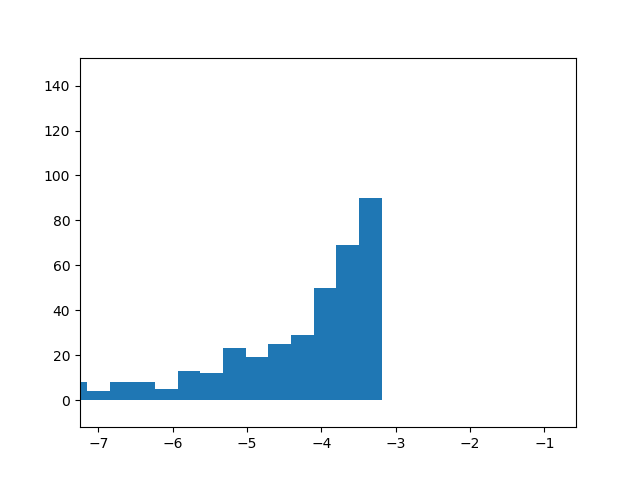

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  1.,  2.,  2.,  0.,  1.,  3.,  0.,
         1.,  3.,  1.,  3.,  2.,  2.,  1.,  0.,  6.,  6.,  2.,  1.,  2.,
         2.,  4.,  4.,  0.,  5.,  4.,  5.,  7.,  8.,  4.,  8.,  8.,  5.,
        13., 12., 23., 19., 25., 29., 50., 69., 90.]),
 array([-33.71287882, -33.40762389, -33.10236897, -32.79711404,
        -32.49185912, -32.18660419, -31.88134927, -31.57609434,
        -31.27083942, -30.96558449, -30.66032957, -30.35507464,
        -30.04981972, -29.74456479, -29.43930987, -29.13405494,
        -28.82880002, -28.52354509, -28.21829017, -27.91303524,
        -27.60778032, -27.30252539, -26.99727047, -26.69201554,
        -26.38676062, -26.08150569, -25.77625077, 

In [55]:
plt.figure()
plt.hist(particles['x'][part_sel,2],100)

In [45]:
plt.axis()

(536111.9193548387, 545248.9193548387, 4178160.988095239, 4184969.988095239)

In [49]:
tongue_clip=(536111.9193548387, 545248.9193548387, 4178160.988095239, 4184969.988095239)
tongue_ts=140
part_time,particles=ptmdata.read_timestep(tongue_ts)
part_sel=utils.within_2d(particles['x'][:,:2],tongue_clip) & (particles['x'][:,2]>-4.5)


In [69]:
avgds

<xarray.Dataset>
Dimensions:       (Nc: 57719, Ne: 108448, Nk: 50, Nkw: 51, Np: 50711, Two: 2, numsides: 6, time: 480)
Coordinates:
    xv            (Nc) float64 5.809e+05 5.827e+05 ... 5.295e+05 5.298e+05
    yv            (Nc) float64 4.151e+06 4.152e+06 ... 4.176e+06 4.176e+06
    xe            (Ne) float64 ...
    ye            (Ne) float64 ...
    z_r           (Nk) float64 ...
    z_w           (Nkw) float64 ...
    Nk            (Nc) int32 ...
  * time          (time) datetime64[ns] 2017-06-10 ... 2017-06-19T23:30:00
Dimensions without coordinates: Nc, Ne, Nkw, Np, Two, numsides
Data variables:
    suntans_mesh  int32 ...
    cells         (Nc, numsides) int32 0 11345 358 ... 999999 999999 999999
    nfaces        (Nc) int32 ...
    face          (Nc, numsides) int32 ...
    edges         (Ne, Two) int32 5057 5058 5053 5057 ... 50664 50705 50664
    neigh         (Nc, numsides) int32 ...
    grad          (Ne, Two) int32 ...
    xp            (Np) float64 5.809e+05 5.825e+05 ..

In [70]:
hydro=xr.open_dataset('/opt/sfb_ocean/suntans/runs/merge_005-20170610avg-retry/ptm_hydro.nc')

In [71]:
hydro

<xarray.Dataset>
Dimensions:                        (Two: 2, date_string_length: 19, nMaxMesh2_face_nodes: 6, nMesh2_data_time: 479, nMesh2_edge: 108448, nMesh2_face: 57719, nMesh2_layer_3d: 50, nMesh2_node: 50711)
Coordinates:
    Mesh2_face_x                   (nMesh2_face) float64 ...
    Mesh2_face_y                   (nMesh2_face) float64 ...
    Mesh2_edge_x                   (nMesh2_edge) float64 ...
    Mesh2_edge_y                   (nMesh2_edge) float64 ...
Dimensions without coordinates: Two, date_string_length, nMaxMesh2_face_nodes, nMesh2_data_time, nMesh2_edge, nMesh2_face, nMesh2_layer_3d, nMesh2_node
Data variables:
    Mesh2_node_x                   (nMesh2_node) float64 ...
    Mesh2_node_y                   (nMesh2_node) float64 ...
    Mesh2_edge_bc                  (nMesh2_edge) float64 ...
    Mesh2_edge_nodes               (nMesh2_edge, Two) float64 ...
    Mesh2_edge_faces               (nMesh2_edge, Two) float64 ...
    Mesh2_face_nodes               (nMesh2_fa

In [72]:
hydro.Mesh2_layer_3d

<xarray.DataArray 'Mesh2_layer_3d' (nMesh2_layer_3d: 50)>
array([3.732751e+03, 3.331257e+03, 2.972781e+03, 2.652713e+03, 2.366938e+03,
       2.111781e+03, 1.883963e+03, 1.680554e+03, 1.498939e+03, 1.336782e+03,
       1.192000e+03, 1.062729e+03, 9.473096e+02, 8.442562e+02, 7.522442e+02,
       6.700906e+02, 5.967393e+02, 5.312470e+02, 4.727717e+02, 4.205616e+02,
       3.739455e+02, 3.323240e+02, 2.951619e+02, 2.619814e+02, 2.323560e+02,
       2.059048e+02, 1.822876e+02, 1.612009e+02, 1.423734e+02, 1.255631e+02,
       1.105540e+02, 9.715299e+01, 8.518779e+01, 7.450458e+01, 6.496600e+01,
       5.644940e+01, 4.884530e+01, 4.205593e+01, 3.599399e+01, 3.058154e+01,
       2.574900e+01, 2.143423e+01, 1.758175e+01, 1.414204e+01, 1.107087e+01,
       8.328760e+00, 5.880443e+00, 3.694446e+00, 1.742663e+00, 0.000000e+00])
Dimensions without coordinates: nMesh2_layer_3d
Attributes:
    long_name:  elevation of layer
    units:      m
    positive:   up
    dz_min:     1e-05

In [87]:
part_time,particles=ptmdata.read_timestep(0)

In [79]:
x0=particles['x'][0,:2]
# particles['x'][:116,:]
x0

array([ 549687.801325, 4188660.766225])

In [88]:
ti=-1+np.searchsorted(avgds.time.values, utils.to_dt64(part_time),side='right') # hydro time step
print("PTM: [%d] %s  AVG: [%d] %s"%(ptm_ts,part_time,
                                    ti,avgds.time.values[ti]))


PTM: [136] 2017-06-18 00:00:00  AVG: [384] 2017-06-18T00:00:00.000000000


In [98]:
avgds['Nkc']=avgds['Nk']
del avgds['Nk']

In [101]:
cell=g.select_cells_nearest(x0,inside=True) # 32468
avgds.uc.isel(time=ti,Nc=cell) # top layer is zero, everybody else is ~+1.0m/s

<xarray.DataArray 'uc' (Nk: 50)>
array([0.      , 0.979165, 0.967866, 0.954579, 0.941528, 0.92779 , 0.913031,
       0.897211, 0.765606, 0.124847,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan,      nan,      nan,      nan,      nan,      nan,      nan,
            nan])
Coordinates:
    xv       float64 5.497e+05
    yv       float64 4.189e+06
    z_r      (Nk) float64 ...
    time     datetime64[ns] 2017-06-18
Dimensions without coordinates: Nk
Attributes:
    long_name:  Time-averaged Eastward water velocity component
    units:      m s-1
    mesh:       suntans_mesh
    location:   face

In [102]:
# particle elevations are -5.03 to -2.53
# avgds.z_r puts the layers at 0.87, 2.82, 5.009
# so it's possible this is miscommunicated, and
# ptm thinks that that 2.82 is the boundary between
# the zero velocity and the real velocity.
# z_w, which I take to be the interface elevations, 
# starts at 0, 
particles['x'][:116,:]


array([[ 5.49687801e+05,  4.18866077e+06, -5.03820801e+00],
       [ 5.49687801e+05,  4.18866077e+06, -5.01638985e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.99457169e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.97275352e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.95093536e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.92911720e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.90729713e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.88547897e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.86365891e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.84184074e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.82002258e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.79820442e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.77638626e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.75456810e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.73274803e+00],
       [ 5.49687801e+05,  4.18866077e+06, -4.71092987e+00],
       [ 5.49687801e+05,  4.18866077e+06

In [110]:
# so the first z_r is halfway between the first 2 entries
# of z_w.  but for the rest of z_r, z_r is slightly deeper 
# than halfway between z_w's.

# maybe they both come from some sort of exponential?
avgds.z_r
z_w=avgds.z_w.values
0.5*(z_w[:-1]+z_w[1:]),avgds.z_r

z_r=avgds.z_r.values
0.5*(z_r[:-1]+z_r[1:]), z_w

(array([1.84722300e+00, 3.91611300e+00, 6.23327000e+00, 8.82848600e+00,
        1.17351275e+01, 1.49905660e+01, 1.86366575e+01, 2.27202795e+01,
        2.72939360e+01, 3.24164315e+01, 3.81536265e+01, 4.45792850e+01,
        5.17760225e+01, 5.98363685e+01, 6.88639560e+01, 7.89748525e+01,
        9.02990575e+01, 1.02982168e+02, 1.17187248e+02, 1.33096938e+02,
        1.50915793e+02, 1.70872913e+02, 1.93224888e+02, 2.18259097e+02,
        2.46297412e+02, 2.77700327e+02, 3.12871592e+02, 3.52263407e+02,
        3.96382242e+02, 4.45795337e+02, 5.01138002e+02, 5.63121787e+02,
        6.32543627e+02, 7.10296087e+02, 7.97378843e+02, 8.94911528e+02,
        1.00414813e+03, 1.12649313e+03, 1.26351953e+03, 1.41698908e+03,
        1.58887498e+03, 1.78138718e+03, 1.99700083e+03, 2.23848813e+03,
        2.50895393e+03, 2.81187563e+03, 3.15114793e+03, 3.53113293e+03,
        3.95671613e+03]),
 array([0.00000000e+00, 1.74266300e+00, 3.69444600e+00, 5.88044300e+00,
        8.32876000e+00, 1.10708750e+01

In [113]:
hydro

<xarray.Dataset>
Dimensions:                        (Two: 2, date_string_length: 19, nMaxMesh2_face_nodes: 6, nMesh2_data_time: 479, nMesh2_edge: 108448, nMesh2_face: 57719, nMesh2_layer_3d: 50, nMesh2_node: 50711)
Coordinates:
    Mesh2_face_x                   (nMesh2_face) float64 ...
    Mesh2_face_y                   (nMesh2_face) float64 ...
    Mesh2_edge_x                   (nMesh2_edge) float64 ...
    Mesh2_edge_y                   (nMesh2_edge) float64 ...
Dimensions without coordinates: Two, date_string_length, nMaxMesh2_face_nodes, nMesh2_data_time, nMesh2_edge, nMesh2_face, nMesh2_layer_3d, nMesh2_node
Data variables:
    Mesh2_node_x                   (nMesh2_node) float64 ...
    Mesh2_node_y                   (nMesh2_node) float64 ...
    Mesh2_edge_bc                  (nMesh2_edge) float64 ...
    Mesh2_edge_nodes               (nMesh2_edge, Two) float64 ...
    Mesh2_edge_faces               (nMesh2_edge, Two) float64 ...
    Mesh2_face_nodes               (nMesh2_fa

In [116]:
# good - same grid coordinates.
#print(x0)
#hydro.Mesh2_face_x.isel(nMesh2_face=cell),hydro.Mesh2_face_y.isel(nMesh2_face=cell)

[ 549687.801325 4188660.766225]


(<xarray.DataArray 'Mesh2_face_x' ()>
 array(549688.18248)
 Coordinates:
     Mesh2_face_x  float64 ...
     Mesh2_face_y  float64 ...
 Attributes:
     long_name:  x-Coordinate of untrim grid face
     units:      m, <xarray.DataArray 'Mesh2_face_y' ()>
 array(4188659.78)
 Coordinates:
     Mesh2_face_x  float64 ...
     Mesh2_face_y  float64 ...
 Attributes:
     long_name:  y-Coordinate of untrim grid face
     units:      m)

In [121]:
js=g.cell_to_edges(cell)
hydro.h_flow_avg.isel(nMesh2_data_time=ti,nMesh2_edge=js)

<xarray.DataArray 'h_flow_avg' (nMesh2_edge: 4, nMesh2_layer_3d: 50)>
array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
         -90.508886, -559.459696, -516.598453, -474.826362, -434.632556,
        -396.524585, -360.923927, -328.267611, -154.477011,   -0.      ],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,       

In [125]:
hydro.Mesh2_sea_surface_elevation.isel(nMesh2_face=cell,nMesh2_data_time=ti) # -2.61
hydro.Mesh2_edge_wet_area.isel(nMesh2_data_time=ti,nMesh2_edge=js)

<xarray.DataArray 'Mesh2_edge_wet_area' (nMesh2_edge: 4, nMesh2_layer_3d: 50)>
array([[   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
         784.831079,  700.741948,  625.662581,  558.627316,  498.774268,
         445.334283,  397.619902,  355.017717, -107.298951,    0.      ],
       [   0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.      ,    0.      ,    0.      ,
           0.      ,    0.      ,    0.     